In [1]:
import os
import sys
sys.path.append('../')
import numpy as np
import json
import matplotlib.pyplot as plt
from utils.utils_plot import get_label, get_color

%matplotlib inline

In [2]:
methods = {
  # 'No_Deconv':('--', 1, 4.5),
  # 'Richard-Lucy(10)':('-', 0.6, 2.5), 'Richard-Lucy(20)':('-', 0.7, 3.5), 'Richard-Lucy(30)':('-', 0.8, 4.5), 'Richard-Lucy(50)':('-', 0.9, 5), 
  'Richard-Lucy(10)':('-', 1, 5),
  'FPFS':('-',1, 4.5),
  'Tikhonet_Laplacian':('-', 1, 4.5), 'ShapeNet':('-', 1, 4.5),
  # 'Unrolled_ADMM_Gaussian(2)':('-', 0.7, 2.5),  'Unrolled_ADMM_Gaussian(4)':('-', 0.8, 3.5),
  'Unrolled_ADMM_Gaussian(8)':('-', 1, 4.5)
  }
admmnet_errs = [0.11445783132530121, 0.06361445783132531, 0.044337349397590375, 0.03421686746987952, 0.02746987951807231]
snrs = [20, 40, 60, 80, 100, 150, 200]
results_path = '../results/'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


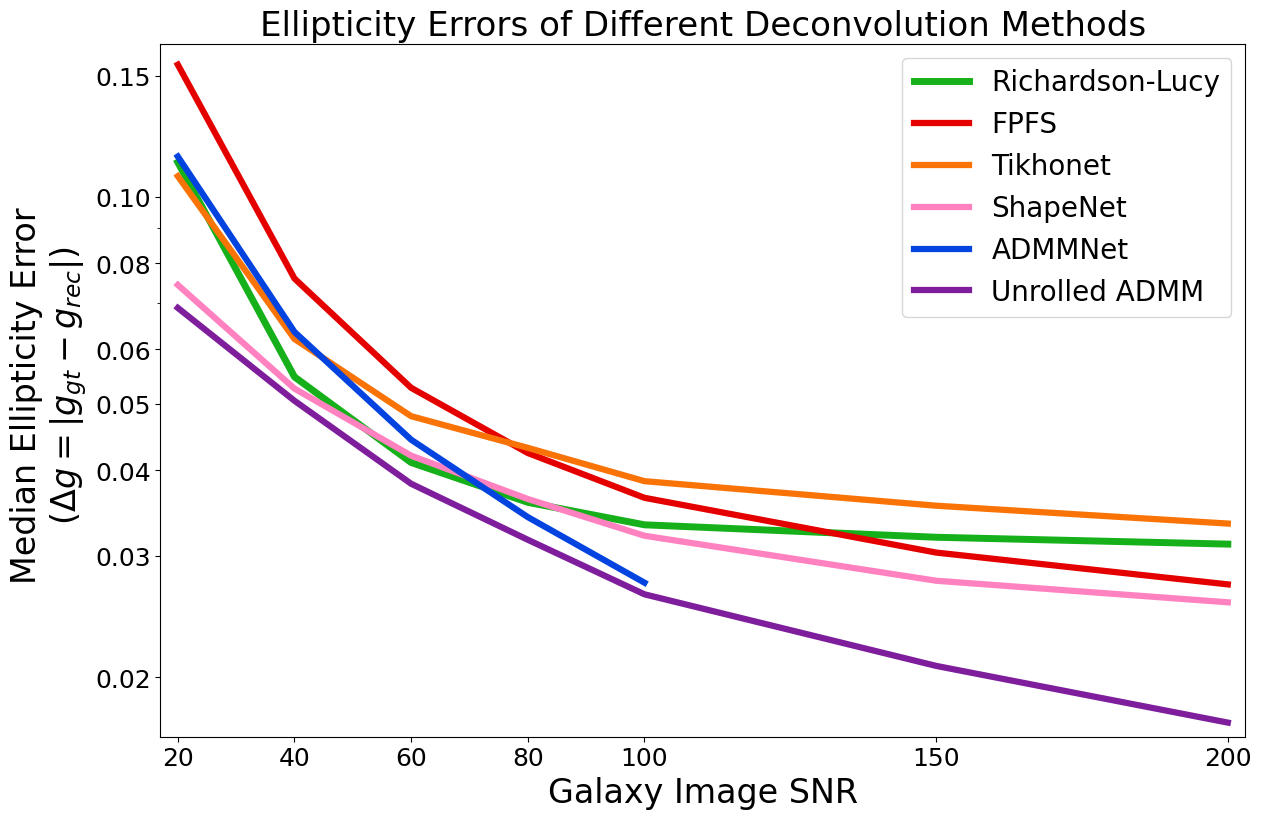

In [3]:
fig, ax1 = plt.subplots(figsize=(14,9), facecolor='white')

for method in methods:
    label = get_label(method)
    color = get_color(method)
    g_errs, g_stds = [], []
    
    results_file = os.path.join(results_path, method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    
    if method == 'Unrolled_ADMM_Gaussian(8)':
        ax1.plot(snrs[0:5], admmnet_errs, '-', label='ADMMNet', color='xkcd:blue', linewidth=4.5, alpha=1)
    
    for snr in snrs:
        gt_shear = np.array(results[str(snr)]['gt_shear'])
        rec_shear = np.array(results[str(snr)]['rec_shear'])
        rec_err = np.abs(rec_shear - gt_shear)
        rec_err = np.minimum(rec_err, np.ones_like(rec_err))
        g_errs.append(np.median(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))
    if methods[method][1] == 1:
        ax1.plot(snrs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][2], alpha=methods[method][1])
    else:
        ax1.plot(snrs, g_errs, methods[method][0], color=color, linewidth=methods[method][2], alpha=methods[method][1])

ax1.set_yscale('log', base=10)
ax1.set_ylim(0.0164,0.167)
ax1.set_yticks([0.02,0.03,0.04,0.05,0.06,0.08,0.1,0.15])
ax1.set_yticklabels(['0.02','0.03','0.04','0.05','0.06','0.08','0.10','0.15'])
ax1.set_ylabel('Median Ellipticity Error \n ($\Delta g=|g_{gt} - g_{rec}|$)', fontsize=24)

ax1.set_xlim([17, 203])
ax1.set_xticks(snrs)
ax1.set_xticklabels(['20','40','60','80','100','150','200'])
ax1.set_xlabel('Galaxy Image SNR', fontsize=24)

plt.legend(fontsize=20)
plt.tick_params(labelsize=18)
plt.title('Ellipticity Errors of Different Deconvolution Methods', fontsize=24.5)

plt.savefig('err_snr.eps', bbox_inches='tight')
plt.savefig('err_snr.jpg', bbox_inches='tight')

### Error Improvements for Abstract

In [4]:
methods = ['Richard-Lucy(10)', 'ShapeNet', 'Unrolled_ADMM_Gaussian(8)']
errs = {'20':[], '200':[]}

for method in methods:
    results_file = os.path.join(results_path, method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
        
    for snr in errs:
        gt_shear = np.array(results[str(snr)]['gt_shear'])
        rec_shear = np.array(results[str(snr)]['rec_shear'])
        rec_err = np.abs(rec_shear - gt_shear)
        errs[snr].append(np.median(rec_err[:,2]))

In [5]:
for snr in errs:
    print("SNR={}\t {:.1f}%\t {:.1f}%".format(snr, 100*(errs[snr][0]-errs[snr][2])/errs[snr][0], 100*(errs[snr][1]-errs[snr][2])/errs[snr][1]))

SNR=20	 38.6%	 7.4%
SNR=200	 45.0%	 33.2%


In [6]:
methods = {
  # 'Richard-Lucy(10)':('-', 0.6, 2.5), 'Richard-Lucy(20)':('-', 0.7, 3.5), 'Richard-Lucy(30)':('-', 0.8, 4.5), 'Richard-Lucy(50)':('-', 0.9, 5), 
  'Richard-Lucy(10)':('-', 1, 5),
  'FPFS':('-',1, 4.5),
  # 'Wiener':('-', 1, 4.5),
  # 'ADMMNet':('.b', 1, 4.5),
  'Tikhonet_Laplacian':('-', 1, 4.5), 'ShapeNet':('-', 1, 4.5),
  # 'Unrolled_ADMM_Gaussian(2)':('-', 0.7, 2.5),  'Unrolled_ADMM_Gaussian(4)':('-', 0.8, 3.5),
  'Unrolled_ADMM_Gaussian(8)':('-', 1, 4.5)
  }
admmnet_errs = [0.11445783132530121, 0.06361445783132531, 0.044337349397590375, 0.03421686746987952, 0.02746987951807231]
snrs = [20, 40, 60, 80, 100, 150, 200]
results_path = '../results_200/'

Text(0.5, 1.0, 'Ellipticity Errors of Different Deconvolution Methods')

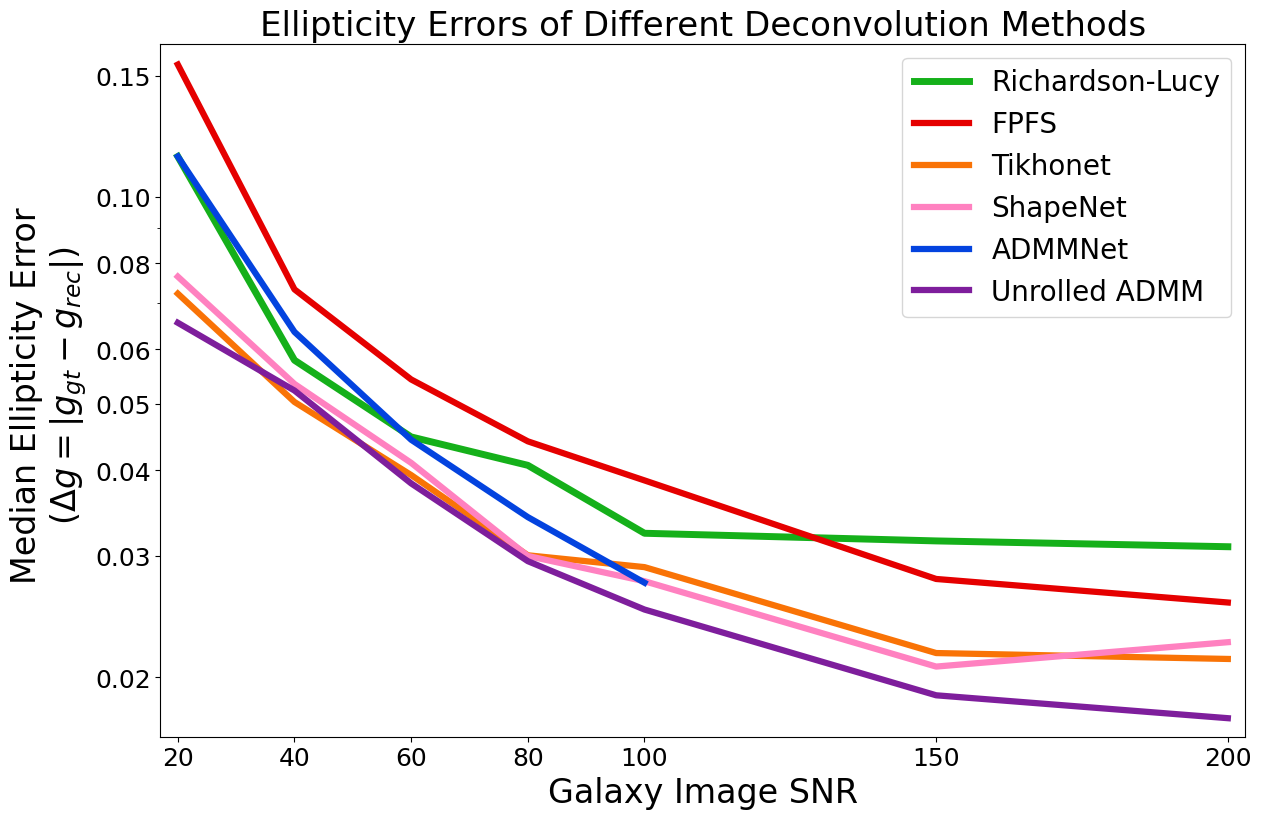

In [7]:
fig, ax1 = plt.subplots(figsize=(14,9), facecolor='white')

gt_shear = {}
with open(os.path.join(results_path, 'No_Deconv', 'results.json'), 'r') as f:
    results = json.load(f)
for snr in snrs:
    gt_shear[str(snr)] = results[str(snr)]['gt_shear']

for method in methods:
    label = get_label(method)
    color = get_color(method)
    g_errs, g_stds = [], []
    
    results_file = os.path.join(results_path, method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    
    if method == 'Unrolled_ADMM_Gaussian(8)':
        ax1.plot(snrs[0:5], admmnet_errs, '-', label='ADMMNet', color='xkcd:blue', linewidth=4.5, alpha=1)
    
    for snr in snrs:
        rec_shear = np.array(results[str(snr)]['rec_shear'])
        rec_err = np.abs(rec_shear - gt_shear[str(snr)])
        rec_err = np.minimum(rec_err, np.ones_like(rec_err))
        g_errs.append(np.median(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))
    if methods[method][1] == 1:
        ax1.plot(snrs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][2], alpha=methods[method][1])
    else:
        ax1.plot(snrs, g_errs, methods[method][0], color=color, linewidth=methods[method][2], alpha=methods[method][1])

ax1.set_yscale('log', base=10)
ax1.set_ylim(0.0164,0.167)
ax1.set_yticks([0.02,0.03,0.04,0.05,0.06,0.08,0.1,0.15])
ax1.set_yticklabels(['0.02','0.03','0.04','0.05','0.06','0.08','0.10','0.15'])
ax1.set_ylabel('Median Ellipticity Error \n ($\Delta g=|g_{gt} - g_{rec}|$)', fontsize=24)

ax1.set_xlim([17, 203])
ax1.set_xticks(snrs)
ax1.set_xticklabels(['20','40','60','80','100','150','200'])
ax1.set_xlabel('Galaxy Image SNR', fontsize=24)

plt.legend(fontsize=20)
plt.tick_params(labelsize=18)
plt.title('Ellipticity Errors of Different Deconvolution Methods', fontsize=24.5)